In [19]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 30
# plt.rcParams["font.weight"] = 'bold'
%matplotlib inline


# pm2.5

In [2]:
s1 = pd.read_csv('서면1.csv')
s1=s1.dropna(axis=0) # 결측값 행 제거
s1


,year,month,day,hour,PM2.5 (μg/m³),PM2.5 (μg/m³).1,PM10 (μg/m³),PM10 (μg/m³).1
0,2019,1,1,0,14.0,22.0,29.0,30.0
1,2019,1,1,1,13.0,18.0,31.0,31.0
2,2019,1,1,2,13.0,24.0,29.0,23.0
3,2019,1,1,3,18.0,18.0,25.0,19.0
4,2019,1,1,4,18.0,15.0,27.0,25.0
...,...,...,...,...,...,...,...,...
52579,2014,12,31,19,19.0,29.0,53.0,47.0
52580,2014,12,31,20,13.0,23.0,39.0,40.0
52581,2014,12,31,21,19.0,33.0,53.0,50.0
52582,2014,12,31,22,24.0,32.0,61.0,49.0


In [3]:
# 이상값 제거
s1 = s1.drop(s1[s1['PM2.5 (μg/m³)']>200].index)
s1.shape

(50535, 8)

In [4]:
s1 = s1.drop(s1[s1['PM2.5 (μg/m³).1']>200].index)
s1.shape

(50503, 8)

# pm2.5 ols summary

In [5]:

lm = sm.OLS(s1['PM2.5 (μg/m³)'], s1[['PM2.5 (μg/m³).1']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          PM2.5 (μg/m³)   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.961e+05
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                        0.00
Time:                        13:06:35   Log-Likelihood:                     -1.8561e+05
No. Observations:               50503   AIC:                                  3.712e+05
Df Residuals:                   50502   BIC:                                  3.712e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
PM2.5 (μg/m³).1     0.8858      0.001    629.379      0.000       0.883       0.889
==============================================================================
Omnibus:                    11702.816   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637085.360
Skew:                          -0.130   Prob(JB):                         0.00
Kurtosis:                      20.398   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y=s1['PM2.5 (μg/m³).1']
x=s1['PM2.5 (μg/m³)']

slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

print("기울기(slope) = {:3.5f}".format(slope))
print("Y-절편(intercept) = {:3.5}".format(intercept))
print("상관계수(correlation coefficient) = {:3.5}" .format(r_value))
print(r_value**2)

기울기(slope) = 0.76226
Y-절편(intercept) = 7.9396
상관계수(correlation coefficient) = 0.77136
0.5949933731895066


# 선형회귀선 그래프

In [34]:
linear_regression = linear_model.LinearRegression(fit_intercept=False)
linear_regression.fit(X=pd.DataFrame(s1['PM2.5 (μg/m³)']), y= s1['PM2.5 (μg/m³).1'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['PM2.5 (μg/m³)']))

residuals = s1['PM2.5 (μg/m³).1'] - prediction
residuals.describe()

# linear_regression.intercept_ = 0
# print("a value: ", linear_regression.intercept_)
# print("b value: ", linear_regression.coef_)

count    50521.000000
mean         5.403375
std         23.998650
min       -830.648934
25%          0.440903
50%          4.960602
75%          9.722334
max        985.000000
Name: PM2.5 (μg/m³).1, dtype: float64

In [35]:
#잔차 제곱 합
SSE = (residuals**2).sum()
SST = ((s1['PM2.5 (μg/m³).1']-s1['PM2.5 (μg/m³).1'].mean())**2).sum()
R_squared = 1-(SSE/SST)
print("R_squared: ", R_squared)

R_squared:  0.026400026725676984


(0, 200)

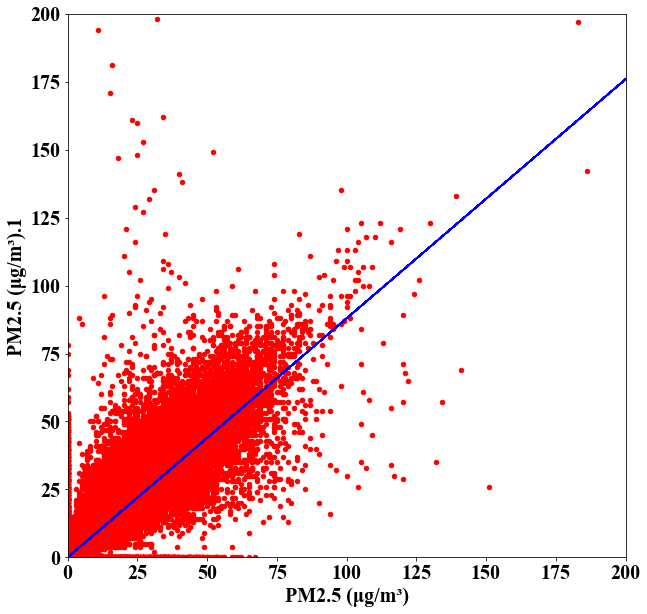

In [36]:
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='PM2.5 (μg/m³)', y='PM2.5 (μg/m³).1',color="red")
plt.plot(s1['PM2.5 (μg/m³)'],prediction,'b')


ax.set_ylim(0,200)
ax.set_xlim(0,200)

In [10]:
# lm = sm.OLS(s1['PM2.5 (μg/m³)'], s1[['PM2.5 (μg/m³).1']])
# results = lm.fit()
# results.summary()

# pm10

In [37]:
s1 = pd.read_csv('서면1.csv')
s1=s1.dropna(axis=0) # 결측값 행 제거

# 이상값 제거

s1 = s1.drop(s1[s1['PM10 (μg/m³)']>300].index)
s1 = s1.drop(s1[s1['PM10 (μg/m³).1']>300].index)
s1.shape

(50521, 8)

In [38]:
linear_regression = linear_model.LinearRegression(fit_intercept=False)
linear_regression.fit(X=pd.DataFrame(s1['PM10 (μg/m³)']), y= s1['PM10 (μg/m³).1'])
prediction = linear_regression.predict(X=pd.DataFrame(s1['PM10 (μg/m³)']))

residuals = s1['PM10 (μg/m³).1'] - prediction
residuals.describe()

# linear_regression.intercept_ = 0
# print("a value: ", linear_regression.intercept_)
# print("b value: ", linear_regression.coef_)

count    50521.000000
mean         2.932237
std         16.134603
min       -194.575091
25%         -4.054159
50%          2.762703
75%          9.730877
max        267.160805
Name: PM10 (μg/m³).1, dtype: float64

기울기(slope) = 0.70259
Y-절편(intercept) = 14.388
상관계수(correlation coefficient) = 0.72834
0.5304857796580521


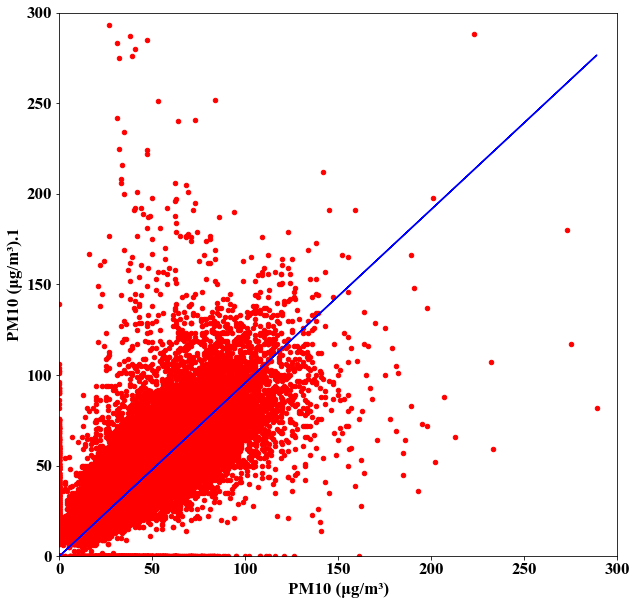

In [39]:
plt.rcParams["font.size"] = 17

plt.rcParams["figure.figsize"] = (10,10)

ax = s1.plot(kind="scatter", x='PM10 (μg/m³)', y='PM10 (μg/m³).1',color="red")
plt.plot(s1['PM10 (μg/m³)'],prediction,'b')

ax.set_ylim(0,300)
ax.set_xlim(0,300)

y=s1['PM10 (μg/m³).1']
x=s1['PM10 (μg/m³)']

slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)

print("기울기(slope) = {:3.5f}".format(slope))
print("Y-절편(intercept) = {:3.5}".format(intercept))
print("상관계수(correlation coefficient) = {:3.5}" .format(r_value))
print(r_value**2)